In [1]:
source(file = "util.r")

install_packages(c('ggplot2', 'zoo', 'forecast', 'quantmod', 'gridExtra', 'urca'), quietly = T, warn.conflicts = F)

Version 0.4-0 included new data defaults. See ?getSymbols.


## Stationarity

In [2]:
library(repr)
options(repr.plot.width=12, repr.plot.height=6)

### Autocorrelation Plots

[1] "IBM"

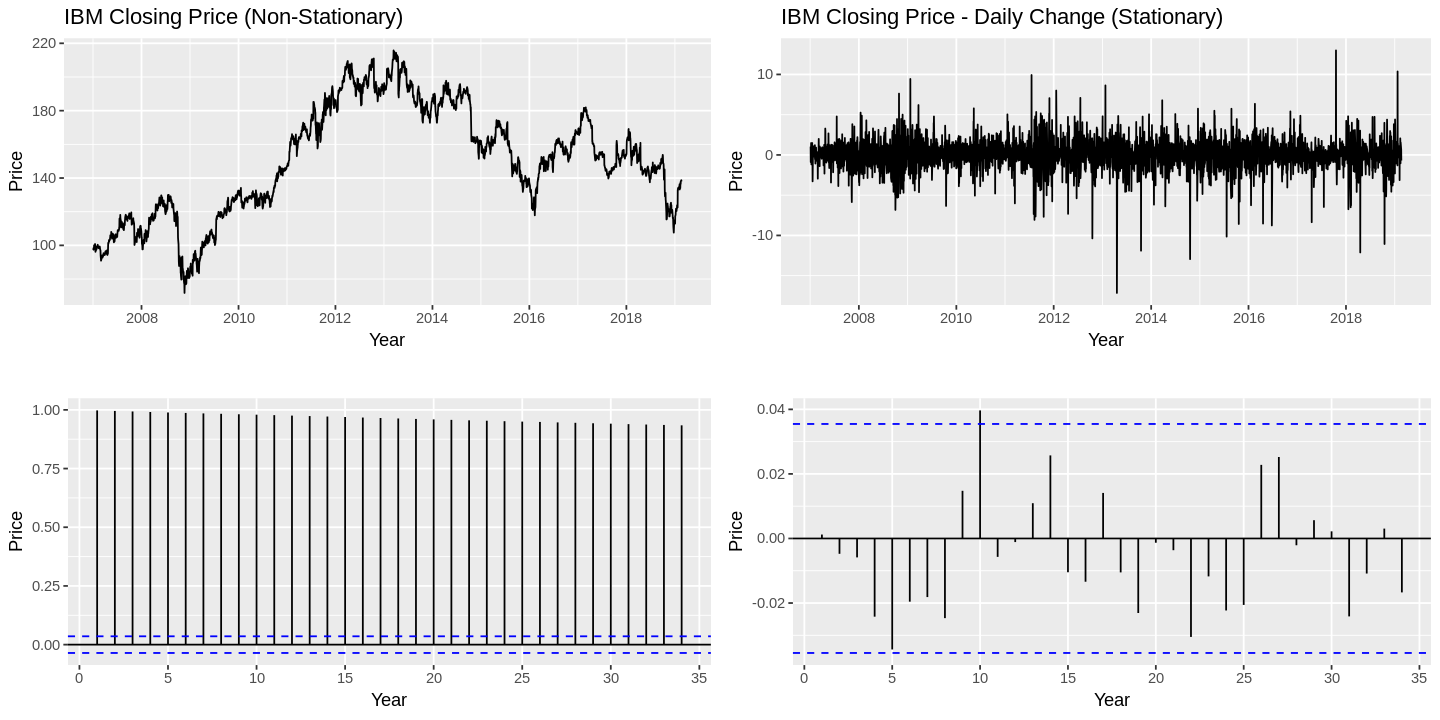

In [3]:
options("getSymbols.warning4.0"=FALSE)  
options("getSymbols.yahoo.warning"=FALSE)
getSymbols("IBM",src="yahoo")

daily_change = diff(Cl(IBM), na.rm=TRUE)

plot1 <- autoplot(IBM$IBM.Close)  +
  ggtitle("IBM Closing Price (Non-Stationary)") +
  xlab("Year") +
  ylab("Price")

plot2 <- ggAcf(IBM$IBM.Close)  +
  ggtitle("") +
  xlab("Year") +
  ylab("Price")

plot3 <- autoplot(daily_change, na.rm=TRUE)  +
  ggtitle("IBM Closing Price - Daily Change (Stationary)") +
  xlab("Year") +
  ylab("Price")

plot4 <- ggAcf(daily_change)  +
  ggtitle("") +
  xlab("Year") +
  ylab("Price")

grid.arrange(plot1, plot3, plot2, plot4, nrow=2, ncol=2)

### Box-Ljung

In [4]:
Box.test(IBM$IBM.Close, lag=10, type="Ljung-Box")


	Box-Ljung test

data:  IBM$IBM.Close
X-squared = 29900, df = 10, p-value < 2.2e-16


In [5]:
Box.test(daily_change, lag=10, type="Ljung-Box")


	Box-Ljung test

data:  daily_change
X-squared = 15.138, df = 10, p-value = 0.1271


---

In [6]:
library(IRdisplay)
display_markdown("<style>table {float:left}</style>") # left align markdown table, below

<style>table {float:left}</style>

OU M249 Guidelines:



| p  <img width=100/>    | Evidence of autocorrelation at lags 1 to k  | dataset
| ---------------------- | ------------------------------------------- | --------------
| $p > 0.10$             | little                                      | daily_change (0.1278)
| $0.10 \geq p > 0.05$   | weak                                        |   
| $0.15 \geq p > 0.01$   | moderate                                    |     
| $p \leq 0.01$          | strong                                      | IBM.Close (2.2e-16)


### Unit root tests

In [7]:
IBM$IBM.Close %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 9 lags. 

Value of test-statistic is: 11.1199 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


---
Test statistic is very high - reject $H_0$.  Thus data is not-stationary.

---

In [8]:
IBM$IBM.Close %>% diff() %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 9 lags. 

Value of test-statistic is: 0.185 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


---
Test statistic is low - don't reject $H_0$.  Thus data is stationary.

---

Verify with ndiffs/nsdiffs

In [9]:
ndiffs(IBM$IBM.Close)

[1] 1

In [10]:
# catch error to allow jupyter to continue running
tryCatch({
    nsdiffs(IBM$IBM.Close)
}, error = function(e) {
    print(e)
})

<simpleError in nsdiffs(IBM$IBM.Close): Non seasonal data>


Ok, error makes sense.  This data isn't seasonal.

---

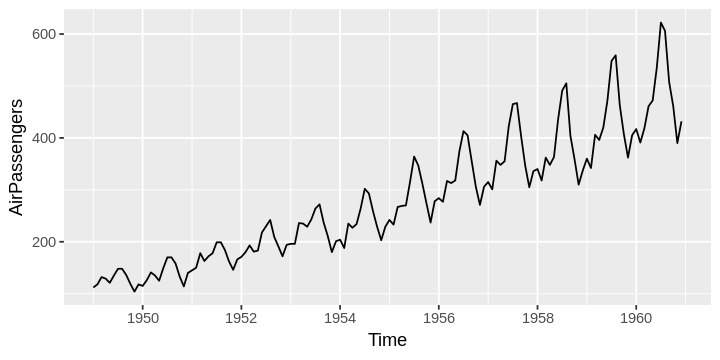

In [11]:
library(repr)
options(repr.plot.width=6, repr.plot.height=3)

autoplot(AirPassengers)

In [12]:
AirPassengers %>% ndiffs()

[1] 1

In [13]:
AirPassengers %>% log() %>% ndiffs()

[1] 1

In [14]:
AirPassengers %>% log() %>% diff() %>% ndiffs()

[1] 0

In [15]:
AirPassengers %>% log() %>% diff() %>% nsdiffs()

[1] 0

In [16]:
AirPassengers %>% log() %>% nsdiffs()

[1] 1

In [17]:
AirPassengers %>% log() %>% diff(lag=12) %>% ndiffs()

[1] 0

In [18]:
AirPassengers %>% log() %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 2.8287 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [19]:
AirPassengers %>% log() %>% diff() %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.0282 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [20]:
AirPassengers %>% log() %>% diff(lag=12) %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.3682 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


---

It appears that diff() is sufficient for AirPassengers data

---